<a href="https://colab.research.google.com/github/rohanrb302/FakeNewsClassification/blob/master/Implemenation_LogisticRegression%26RandomForrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt

Reading the data

In [0]:
MAX_SEQUENCE_LENGTH = 5000
MAX_NUM_WORDS = 25000
EMBEDDING_DIM = 300
TEST_SPLIT = 0.25

In [0]:

df=pd.read_csv('/content/News_data_NYT_Guardian.csv')
headline = df['title']

In [0]:
df.drop(labels=['title','Unnamed: 0'], axis='columns', inplace=True)
# only select stories with lengths gt 0 -- there are some texts with len = 0
mask = list(df['text'].apply(lambda x: len(x) > 0))
df = df[mask]

In [301]:
df.head()

,text,Label
0,HUGE! Has Wikileaks finally burst the Hillary ...,FAKE
1,"MOBILE, Ala. — It was here, some 16 months ago...",REAL
2,Mayor Bill de Blasio posted a video on his Cit...,REAL
3,BNI Store Nov 7 2016 HERE THEY GO AGAIN! Musli...,FAKE
4,"When Nancy Pelosi, the minority leader of the ...",REAL


In [0]:
from sklearn.metrics import accuracy_score

def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing errors are reported
    '''
    # training error
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing error
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    
    return train_acc, test_acc

In [303]:
df.head()

,text,Label
0,HUGE! Has Wikileaks finally burst the Hillary ...,FAKE
1,"MOBILE, Ala. — It was here, some 16 months ago...",REAL
2,Mayor Bill de Blasio posted a video on his Cit...,REAL
3,BNI Store Nov 7 2016 HERE THEY GO AGAIN! Musli...,FAKE
4,"When Nancy Pelosi, the minority leader of the ...",REAL


In [304]:

texts = df['text']
labels = df['Label']


print('Found %s texts.' %texts.shape[0])

Found 1941 texts.


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_body_tfidf = tfidf.fit_transform(texts)

In [308]:
type(X_body_tfidf)

scipy.sparse.csr.csr_matrix

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# data vectorizer
vectorizer = CountVectorizer(analyzer = "word", 
                             binary = True, 
                             min_df = 2,
                             stop_words='english')
docarray = vectorizer.fit_transform(texts).toarray()
docterm = pd.DataFrame(docarray, columns=vectorizer.get_feature_names())

In [0]:
X_body_tfidf = tfidf.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X_body_tfidf,labels, test_size = 0.25, random_state=1234)

In [0]:
lr_body = LogisticRegression()

In [312]:
from sklearn.model_selection import GridSearchCV
c= lr_body
#Used to find the best parameters for our model
parameters = {'penalty':[ 'l2','none'],'C':[0.1,0.2,.5,1,2,5,10]}
clf = GridSearchCV(c, parameters,cv=5)
clf.fit(X_train,y_train)
(clf.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

{'C': 5, 'penalty': 'l2'}

In [313]:
lr_body=LogisticRegression(C=5)
#Running Cross Validation on our datatset
from sklearn.model_selection import cross_val_score
cros_val_list = cross_val_score(lr_body,X_body_tfidf,labels)
print(f'The cross validation score is given as {cros_val_list.mean()*100}')

The cross validation score is given as 90.77836376646437


In [0]:
lr_body.fit(X_train, y_train)

# get predictions for article section
y_body_pred = lr_body.predict(X_test)

In [0]:
acc = accuracy_score(y_test, y_body_pred)*100

In [316]:
print(f"The accuracy for the logitisc regression algorithm can be given by :{acc} %")

The accuracy for the logitisc regression algorithm can be given by :88.88888888888889 %


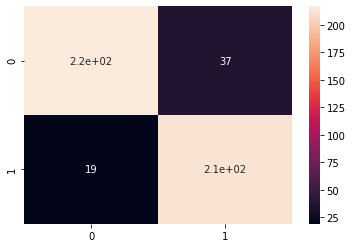

In [317]:
ConfusionMAt =confusion_matrix(y_test,y_rc_body_pred)
import seaborn as sns
sns.heatmap(ConfusionMAt, annot=True)

In [0]:
# rcf_body = RandomForestClassifier(n_estimators=100,n_jobs=3)


In [318]:
from sklearn.model_selection import GridSearchCV
c= RandomForestClassifier()
parameters = {'max_depth':[2,3,4,5,10,20],'n_estimators':[10,20,50,100],'n_jobs':[3,4]}
clf = GridSearchCV(c, parameters,cv=5)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 20, 'n_estimators': 100, 'n_jobs': 3}

In [320]:
rcf_body = RandomForestClassifier(n_estimators=100,n_jobs=3,max_depth=20)
cros_val_list = cross_val_score(rcf_body,X_body_tfidf,labels)
print(f'The cross validation score is given as {cros_val_list.mean()*100}')


The cross validation score is given as 89.02631648689476


In [0]:
rcf_body.fit(X_train, y_train)
y_rc_body_pred = rcf_body.predict(X_test)

In [0]:
acc_2 = accuracy_score(y_test, y_rc_body_pred)*100

In [323]:
print(f"The accuracy for the random forest algorithm can be given by :{acc_2}")

The accuracy for the random forest algorithm can be given by :88.68312757201646


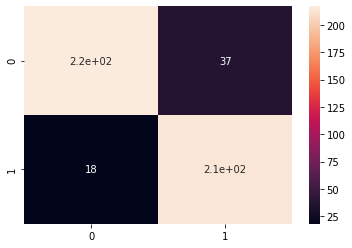

In [324]:
ConfusionMAt =confusion_matrix(y_test,y_rc_body_pred)
import seaborn as sns
sns.heatmap(ConfusionMAt, annot=True)

In [0]:
# cros_val_list = cross_val_score(rcf_body,X_body_tfidf,labels)
# print(f'The cross validation score is given as {cros_val_list.mean()*100}')


Implementing the same classification using just the headline(title)

In [0]:
X_title_tfidf = tfidf.fit_transform(headline)
X_train, X_test, y_train, y_test = train_test_split(X_title_tfidf,labels, test_size = 0.25, random_state=1234)

In [0]:
lr_title = LogisticRegression()

In [0]:
lr_title.fit(X_train, y_train)

# get predictions for article section
y_title_pred = lr_title.predict(X_test)

In [0]:
acc = accuracy_score(y_test, y_title_pred)

In [329]:
acc

0.7613168724279835

In [0]:
rcf_title = RandomForestClassifier(n_estimators=100,n_jobs=3)


In [0]:
rcf_title.fit(X_train, y_train)
y_rc_title_pred = rcf_title.predict(X_test)

In [332]:
acc_2 = accuracy_score(y_test, y_rc_title_pred)*100
print(f"The accuracy for the random forest algorithm can be given by :{acc_2}")

The accuracy for the random forest algorithm can be given by :75.1028806584362
